<a id="Top"></a>
---
---
                                   ___                                     ___           ___     
        _____                     /\__\                                   /\  \         /\__\    
       /::\  \       ___         /:/ _/_       ___           ___         /::\  \       /:/ _/_   
      /:/\:\  \     /\__\       /:/ /\  \     /\__\         /\__\       /:/\:\__\     /:/ /\__\  
     /:/  \:\__\   /:/__/      /:/ /::\  \   /:/__/        /:/  /      /:/ /:/  /    /:/ /:/ _/_ 
    /:/__/ \:|__| /::\  \     /:/__\/\:\__\ /::\  \       /:/__/      /:/_/:/__/___ /:/_/:/ /\__\
    \:\  \ /:/  / \/\:\  \__  \:\  \ /:/  / \/\:\  \__   /::\  \      \:\/:::::/  / \:\/:/ /:/  /
     \:\  /:/  /   ~~\:\/\__\  \:\  /:/  /   ~~\:\/\__\ /:/\:\  \      \::/~~/~~~~   \::/_/:/  / 
      \:\/:/  /       \::/  /   \:\/:/  /       \::/  / \/__\:\  \      \:\~~\        \:\/:/  /  
       \::/  /        /:/  /     \::/  /        /:/  /       \:\__\      \:\__\        \::/  /   
        \/__/         \/__/       \/__/         \/__/         \/__/       \/__/         \/__/    
---

#### December 2016


### Table of contents

* [Build prediction model with tflearn and tensorflow](#TF)
    * [Multilayer convolutional neural network](#CNN)
    * [Serialize trained CNN model for serving](#Serialize)

* [Classify digit examples from Digitre](#Digitre)
    * [Example step-by-step preprocessing](#Prep)
    * [Classify preprocessed images](#Class)

In [1]:
# Standard library
import datetime
import time

# Third party libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Digitre code
import digitre_preprocessing as prep
import digitre_model
import digitre_classifier

In [15]:
# Reload digitre code in the same session (during development)
import imp
imp.reload(prep)
imp.reload(digitre_model)
imp.reload(digitre_classifier)

<module 'digitre_classifier' from '/Users/luis/Git/digitre/digitre/digitre_classifier.py'>

In [16]:
# Latest update
str(datetime.datetime.now())

'2017-03-21 19:35:34.787175'

<a id="TF"></a>
# Build prediction model with tflearn and tensorflow

<a id="CNN"></a>
## Multilayer convolutional neural network

Code based on this tflearn [example](https://github.com/tflearn/tflearn/blob/master/examples/images/convnet_mnist.py), with CNN architecture modeled after TensorFlow's tutorial [Deep MNIST for experts](https://www.tensorflow.org/versions/r0.10/tutorials/mnist/pros/).

In [5]:
# Data loading and preprocessing
X, Y, testX, testY = digitre_model.load_data()
#X = X.reshape([-1, 28, 28, 1])
#testX = testX.reshape([-1, 28, 28, 1])

Extracting mnist/train-images-idx3-ubyte.gz


/Users/luis/anaconda3/lib/python3.5/gzip.py:274: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  return self._buffer.read(size)
/Users/luis/anaconda3/lib/python3.5/site-packages/tflearn/datasets/mnist.py:52: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  data = data.reshape(num_images, rows, cols, 1)


Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz


In [6]:
# Plot functions
def plot_digit(digit, show=True, file_name=None):
    plt.imshow(digit, cmap = 'Greys', interpolation = 'none')
    plt.tick_params(axis='both', which='both', bottom='off', top='off',
                    labelbottom='off', right='off', left='off', labelleft='off')
    if file_name is not None:
        plt.savefig(file_name)
    if show:
        plt.show()
    
def plot_digits(digits, rows, columns):
    for i, digit in enumerate(digits):
        plt.subplot(rows, columns, i+1)
        plot_digit(digit, show=False)
    plt.show()

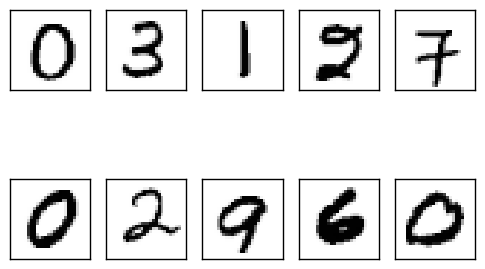

In [7]:
# Plot a few training examples
X_eg = X[10:20,:,:,:]
X_eg = [digit.reshape(28, 28) for digit in X_eg]

plot_digits(X_eg, 2, 5)

In [103]:
# Visualization
# Used "tensorboard_verbose=0", meaning Loss & Metric
# Run "$ tensorboard --logdir='/tmp/tflearn_logs'"

In [104]:
### Fit model using all data (merge training and test data)
# Done from command line:
# $ python digitre_model.py -f 'cnn_alldata.tflearn' -a -e 20

# Training Step: 20320  | total loss: 0.642990.9401 | val_loss: 0.052
# | Adam | epoch: 020 | loss: 0.64299 - acc: 0.9401 | val_loss: 0.05263 - val_acc: 0.9866 -- iter: 65000/65000
# --
# -----
# Completed training in
# 3.5 hr.
# -----
# ... Saving trained model as " cnn_alldata.tflearn "


<a id="Digitre"></a>
# Classify digit examples from Digitre

<a id="Prep"></a>
## Example step-by-step preprocessing

Take example base64-encoded handwritten digit images (generated from html canvas element) and preprocess step-by-step to a format ready for classification model. Compare with MNIST example.

In [17]:
with open('b64_2_preprocessing.txt', 'r') as f:
    eg_2 = f.read()

# Preview base64 encoded image
print(eg_2[:500])

In [18]:
eg_2 = prep.b64_str_to_np(eg_2)
eg_2.shape

(250, 250)

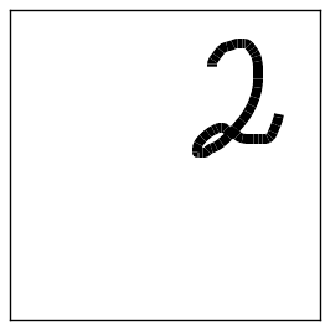

In [19]:
# Plot the example handwritten digit
plot_digit(eg_2, file_name='b64_2_preprocessing_1.png')

In [20]:
eg_2 = prep.crop_img(eg_2)

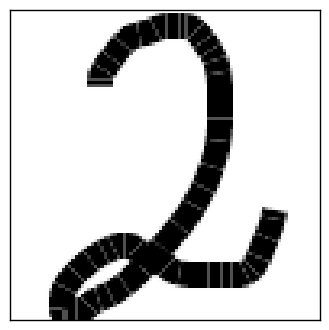

In [21]:
plot_digit(eg_2, file_name='b64_2_preprocessing_2.png')

In [22]:
eg_2 = prep.center_img(eg_2)

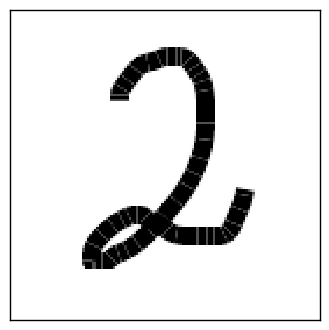

In [23]:
plot_digit(eg_2, file_name='b64_2_preprocessing_3.png')

In [24]:
eg_2 = prep.resize_img(eg_2)
eg_2.shape

(28, 28)

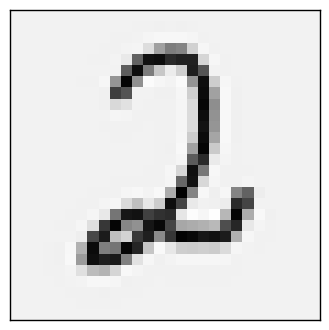

In [25]:
plot_digit(eg_2, file_name='b64_2_preprocessing_4.png')

In [26]:
eg_2 = prep.min_max_scaler(eg_2, final_range=(0, 1))

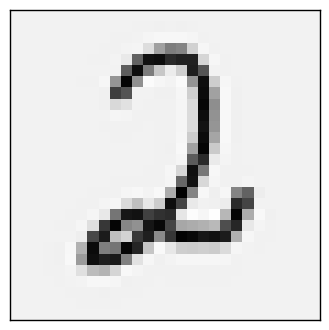

In [27]:
plot_digit(eg_2)

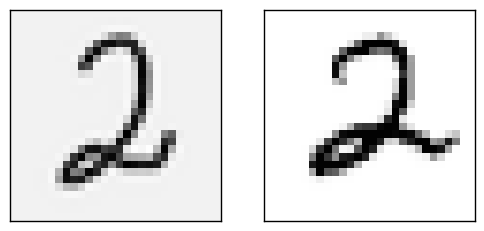

In [28]:
# Plot processed Digitre image together with MNIST example
plot_digits([eg_2, X_eg[6]], 1, 2)

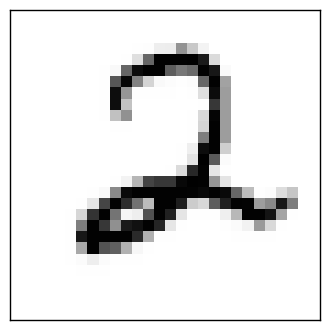

In [29]:
# Save MNIST example too
plot_digit(X_eg[6], file_name='MNIST_2.png')

In [116]:
eg_2.max()

1.0

In [117]:
eg_2.shape

(28, 28)

<a id="Class"></a>
## Classify preprocessed images

In [58]:
# Instantiate Classifier (loads the tflearn pre-trained model)
model = digitre_classifier.Classifier(file_name='cnn.tflearn')

In [118]:
# Classify same example digit
with open('b64_2_preprocessing.txt', 'r') as f:
    eg_2 = f.read()

eg_2 = model.preprocess(eg_2)
pred = np.around(model.classify(eg_2)[0], 2)
pred

array([ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

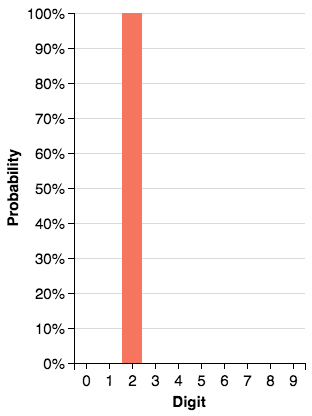

In [119]:
from altair import Chart, Data, X, Y, Axis, Scale

# Plot prediction
def prob_distribution_plot(pred):
    prediction = pred.reshape([10])
    data = Data(values=[{'x': i, 'y': value} for i, value in enumerate(pred)])
    plot = Chart(data).mark_bar(color='#f6755e').encode(
        x=X('x:O', axis=Axis(title='Digit', labelAngle=0.5,
                             tickLabelFontSize=15, titleFontSize=15)),
        y=Y('y:Q', axis=Axis(format='%', title='Probability',
                             tickLabelFontSize=15, titleFontSize=15),
            scale=Scale(domain=(0, 1))))
    
    return plot

prob_distribution_plot(pred)

In [120]:
from altair import Chart, Data, X, Y, Axis

# Plot prediction
def prob_distribution_plot(pred):
    prediction = pred.reshape([10])
    data = Data(values=[{'x': i, 'y': value} for i, value in enumerate(prediction)])
    plot = Chart(data).mark_bar(color='#f6755e').encode(
        x=X('x:O', axis=Axis(title='Digit', labelAngle=0.5, tickLabelFontSize=15, titleFontSize=15)),
        y=Y('y:Q', axis=Axis(format='%', title='Probability', tickLabelFontSize=15, titleFontSize=15)))
    
    return plot.to_json(indent=2)

prob_distribution_plot(pred)

'{\n  "config": {\n    "mark": {\n      "color": "#f6755e"\n    }\n  },\n  "data": {\n    "values": [\n      {\n        "x": 0,\n        "y": 0.0\n      },\n      {\n        "x": 1,\n        "y": 0.0\n      },\n      {\n        "x": 2,\n        "y": 1.0\n      },\n      {\n        "x": 3,\n        "y": 0.0\n      },\n      {\n        "x": 4,\n        "y": 0.0\n      },\n      {\n        "x": 5,\n        "y": 0.0\n      },\n      {\n        "x": 6,\n        "y": 0.0\n      },\n      {\n        "x": 7,\n        "y": 0.0\n      },\n      {\n        "x": 8,\n        "y": 0.0\n      },\n      {\n        "x": 9,\n        "y": 0.0\n      }\n    ]\n  },\n  "encoding": {\n    "x": {\n      "axis": {\n        "labelAngle": 0.5,\n        "tickLabelFontSize": 15.0,\n        "title": "Digit",\n        "titleFontSize": 15.0\n      },\n      "field": "x",\n      "type": "ordinal"\n    },\n    "y": {\n      "axis": {\n        "format": "%",\n        "tickLabelFontSize": 15.0,\n        "title": "Probab

[Back to top](#Top)